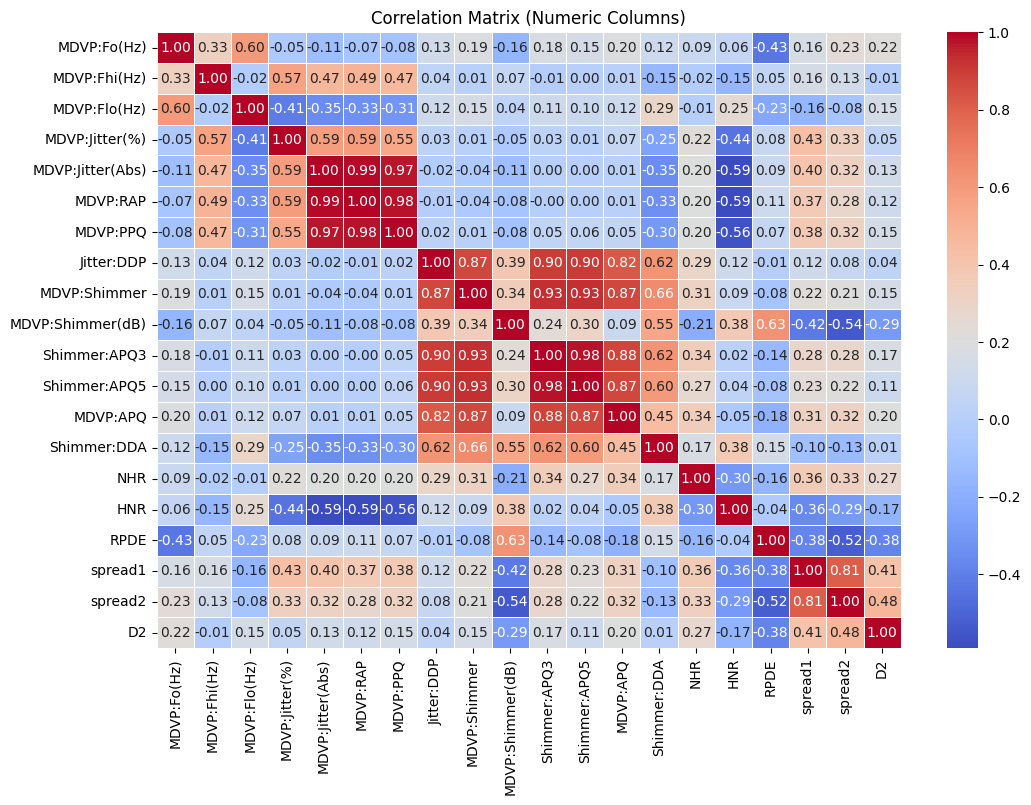

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the data from CSV
df = pd.read_csv('final_data.csv')

# Separate numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove 'status' column as it seems to be a categorical label
numeric_cols.remove('status')

# Perform Standardization
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Compute correlation matrix for numeric columns
corr_matrix = df[numeric_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Numeric Columns)')
plt.show()

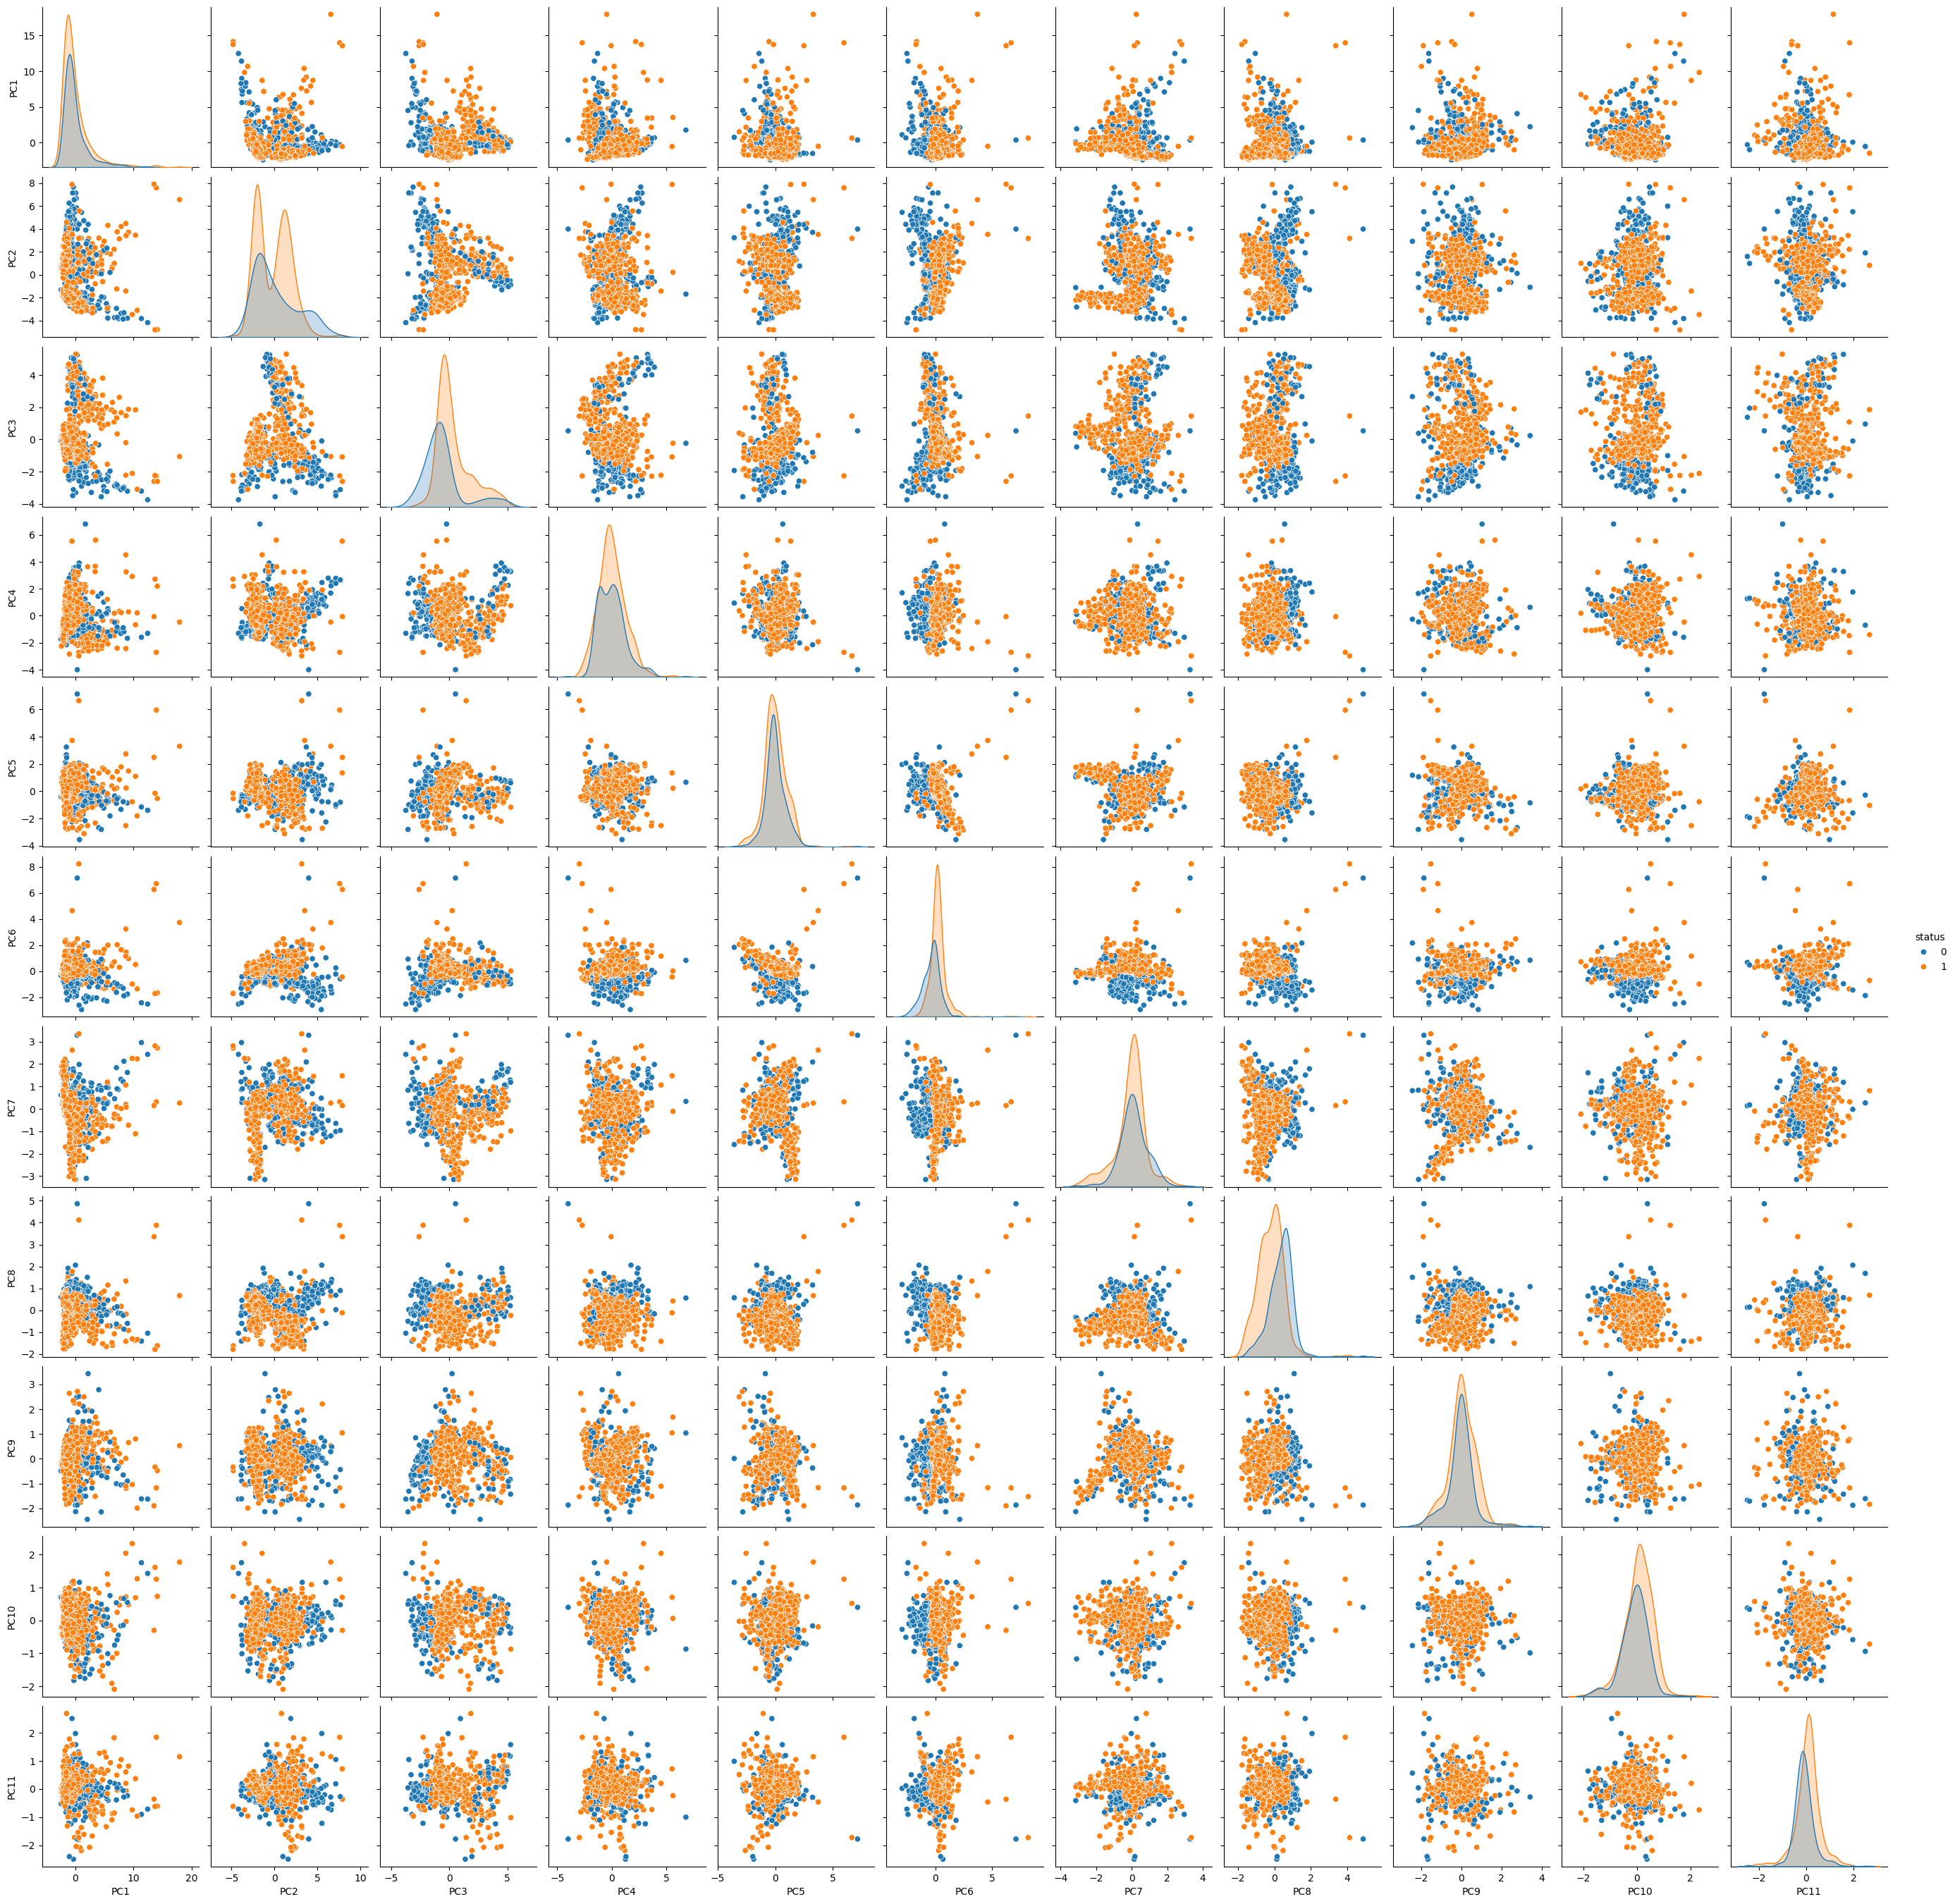

In [11]:
# Apply PCA
pca = PCA()
pca.fit(df[numeric_cols])

# Get transformed data
pca_data = pca.transform(df[numeric_cols])

# Choose the number of principal components
# For example, let's say we want to keep 95% of the variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Perform PCA with the chosen number of components
pca = PCA(n_components=n_components)
pca_df = pd.DataFrame(pca.fit_transform(df[numeric_cols]), columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Concatenate PCA components with status column
pca_df['status'] = df['status']

# Visualize the data after PCA
sns.pairplot(data=pca_df, hue='status')
plt.show()

In [18]:
print("number_of_components : ", n_components)
print("cumulative_variance_ratio : ", cumulative_variance_ratio)

number_of_components :  11
cumulative_variance_ratio :  [0.27557661 0.53193099 0.67657203 0.75522079 0.80307391 0.84184441
 0.88017929 0.90654654 0.93025431 0.94417102 0.95722306 0.96907879
 0.97741565 0.98442115 0.99039275 0.99473408 0.99771646 0.99907794
 0.99980089 1.        ]


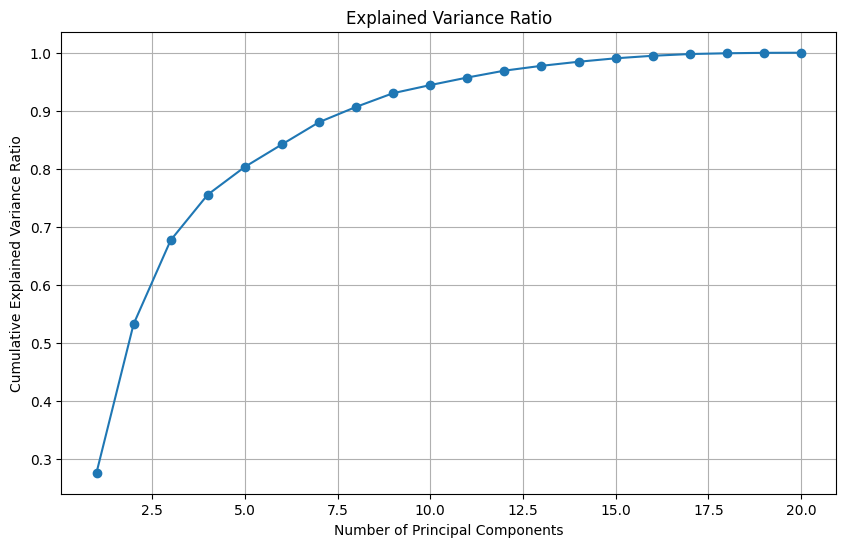

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


In [17]:
# Save transformed data to CSV
pca_df.to_csv('pca_transformed_data.csv', index=False)
